In [1]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
from sklearn.preprocessing  import MinMaxScaler
import seaborn as sns
import sklearn
import keras
%matplotlib inline

Using TensorFlow backend.


# 1. Importing Data

In [2]:
df = pd.read_csv('AAPL.csv')


In [3]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,39.769264,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,39.982990,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,40.426876,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,40.849491,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,40.784698,98506100
5,2012-01-10,60.844284,60.857143,60.214287,60.462856,40.930729,64549100
6,2012-01-11,60.382858,60.407143,59.901428,60.364285,40.864006,53771200
7,2012-01-12,60.325714,60.414288,59.821430,60.198570,40.751816,53146800
8,2012-01-13,59.957142,60.064285,59.808571,59.972858,40.599014,56505400
9,2012-01-17,60.599998,60.855713,60.422855,60.671429,41.071922,60724300


In [4]:
df.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume
1529,2018-01-31,166.869995,168.440002,166.500000,167.429993,166.750137,32478900
1530,2018-02-01,167.169998,168.619995,166.759995,167.779999,167.098724,47230800
1531,2018-02-02,166.000000,166.800003,160.100006,160.500000,159.848282,86593800
1532,2018-02-05,159.100006,163.880005,156.000000,156.490005,155.854568,72738500
1533,2018-02-06,154.830002,163.720001,154.000000,163.029999,162.368011,68243800
1534,2018-02-07,163.089996,163.399994,159.070007,159.539993,158.892166,51608600
1535,2018-02-08,160.289993,161.000000,155.029999,155.149994,154.520004,54390500
1536,2018-02-09,157.070007,157.889999,150.240005,156.410004,156.410004,70672600
1537,2018-02-12,158.500000,163.889999,157.509995,162.710007,162.710007,60819500
1538,2018-02-13,161.949997,164.750000,161.649994,164.339996,164.339996,32549200


In [5]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,1549,1549,2015-01-23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,1549,NaN,NaN,NaN,104.636,30.4488,55.4243,79.2886,100.037,122.32,179.37
High,1549,NaN,NaN,NaN,105.516,30.6125,57.0857,80.1829,101,123.61,180.62
Low,1549,NaN,NaN,NaN,103.706,30.3027,55.0143,78.6886,99.23,121.62,178.25
Close,1549,NaN,NaN,NaN,104.633,30.481,55.79,79.2171,100.35,122.37,179.26
Adj Close,1549,NaN,NaN,NaN,95.3656,36.3552,39.7693,60.2654,95.4241,117.592,178.97
Volume,1549,NaN,NaN,NaN,6.82067e+07,4.96975e+07,1.14759e+07,3.301e+07,5.27884e+07,8.76267e+07,3.7653e+08


In [6]:
df.count()

Date         1549
Open         1549
High         1549
Low          1549
Close        1549
Adj Close    1549
Volume       1549
dtype: int64

In [7]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
df.columns = ['date', 'open', 'high', 'low', 'close', 'price', 'volume']

In [9]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'price', 'volume'], dtype='object')

In [10]:
df = df.convert_objects(convert_numeric=True)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [11]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
price     float64
volume      int64
dtype: object

# 2. Univariate Analysis

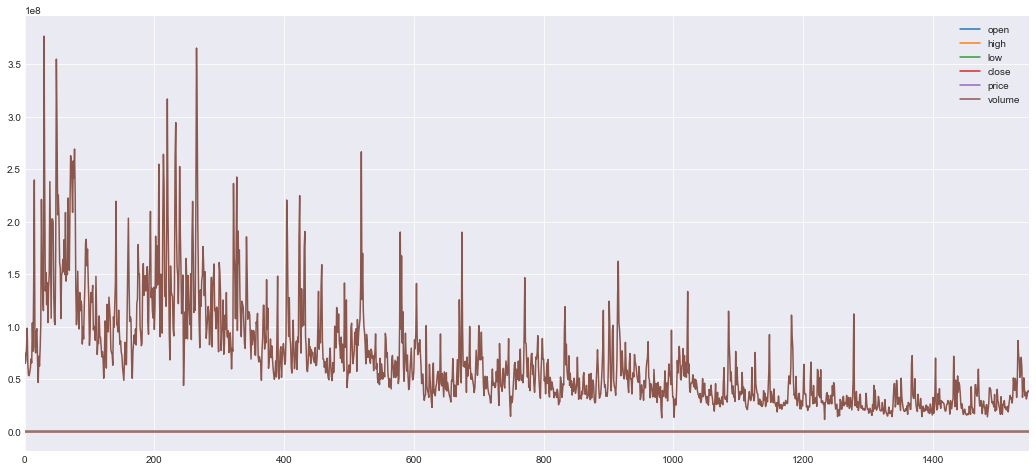

In [12]:
plt.figure(figsize = (16,8))
color = sns.color_palette("husl", 8)
sns.set_style("darkgrid")
df.plot(figsize = (18,8))
plt.show()

In [13]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'price', 'volume'], dtype='object')

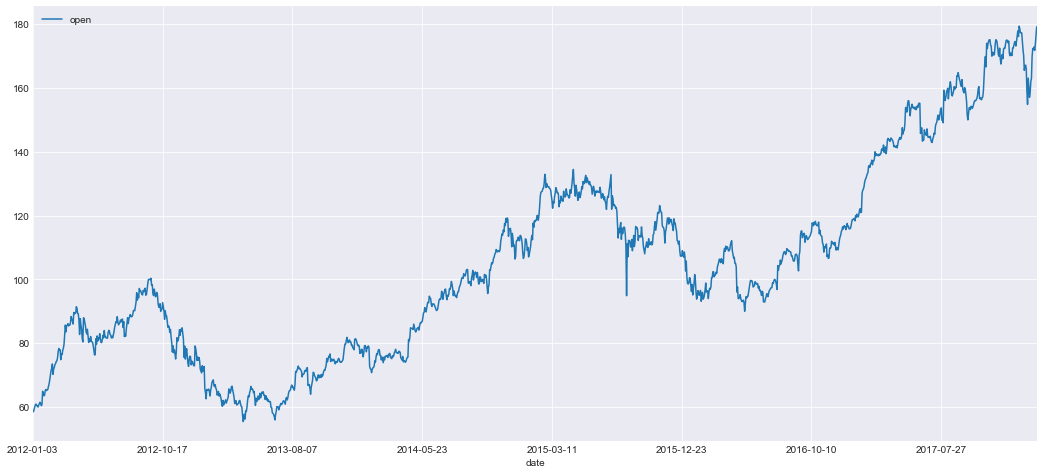

In [14]:
plt.figure(figsize = (16,8))
sns.set_style("darkgrid")
df.plot(x = 'date' , y = 'open' , figsize = (18,8))
plt.show()

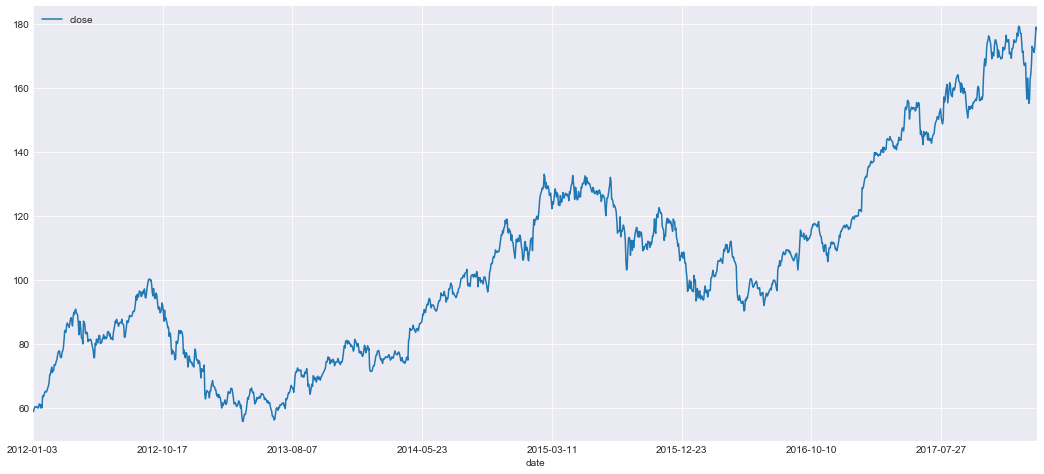

In [15]:
plt.figure(figsize = (16,8))
sns.set_style("darkgrid")
df.plot(x = 'date' , y = 'close' , figsize = (18,8))
plt.show()

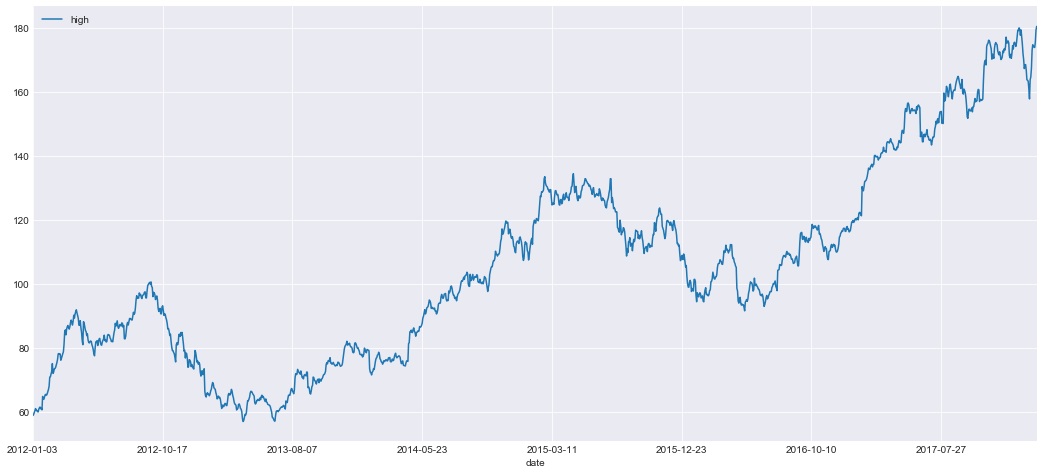

In [16]:
plt.figure(figsize = (16,8))
sns.set_style("darkgrid")
df.plot(x = 'date' , y = 'high' , figsize = (18,8))
plt.show()

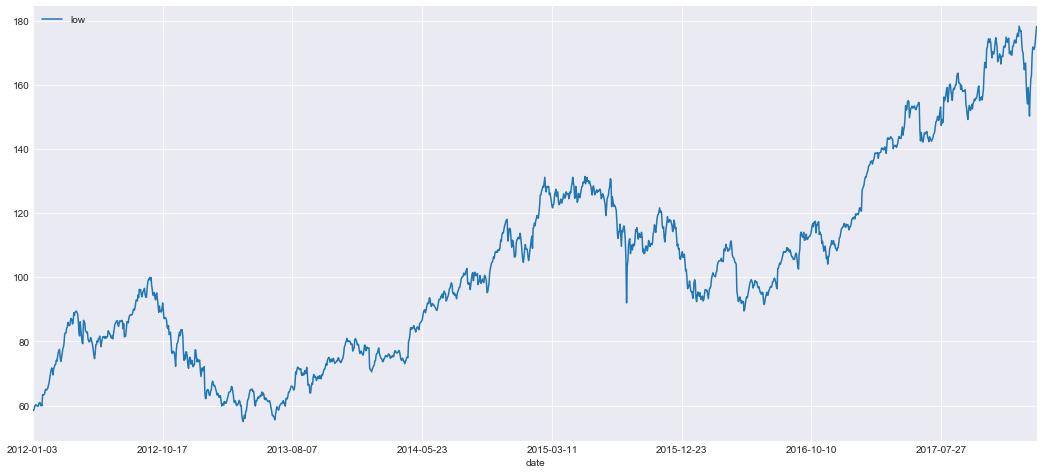

In [17]:
plt.figure(figsize = (16,8))
sns.set_style("darkgrid")
df.plot(x = 'date' , y = 'low' , figsize = (18,8))
plt.show()

# 3. Technical Analysis

# 3.1. Moving Average

In [18]:
df.head()

,date,open,high,low,close,price,volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,39.769264,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,39.982990,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,40.426876,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,40.849491,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,40.784698,98506100


In [19]:
df['ma'] = df.close.rolling(window=5).mean()
df['maopen'] = df.open.rolling(window=5).mean()
df['mahigh'] = df.high.rolling(window =5).mean()
df['malow'] = df.low.rolling(window =5).mean()
df['maclose'] = df.close.rolling(window =5).mean()
df['maprice'] = df.price.rolling(window =5).mean()

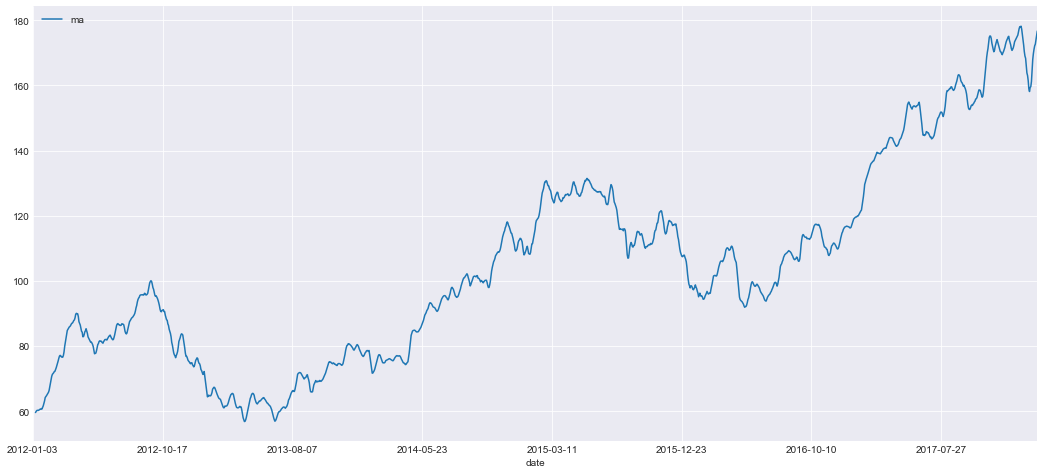

In [20]:
plt.figure(figsize = (16,8))
sns.set_style("darkgrid")
df.plot(x = 'date' , y = 'ma' , figsize = (18,8))
plt.show()

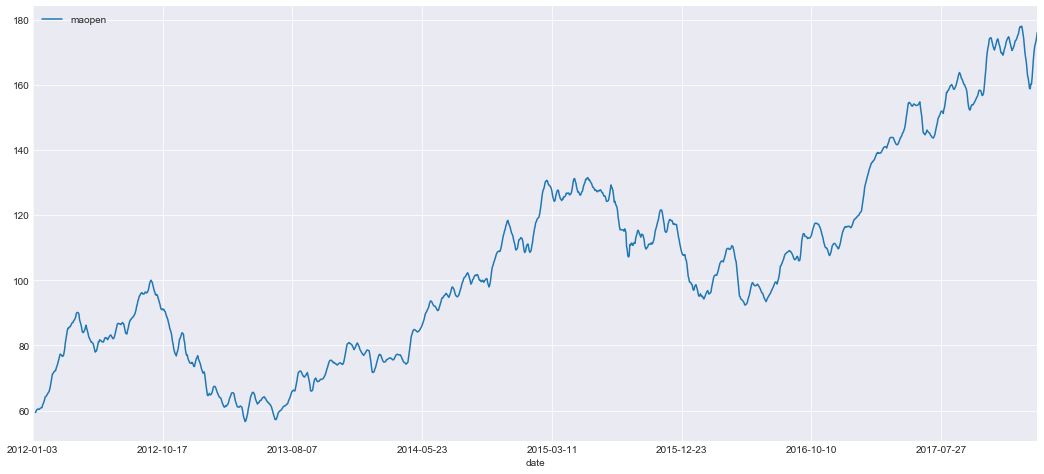

In [21]:
plt.figure(figsize = (16,8))
sns.set_style("darkgrid")
df.plot(x = 'date' , y = 'maopen' , figsize = (18,8))
plt.show()

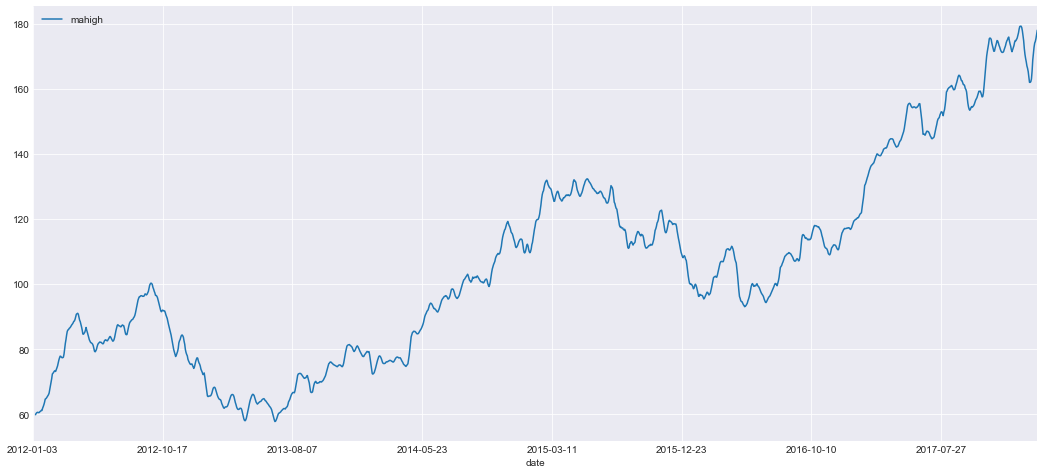

In [22]:
plt.figure(figsize = (16,8))
sns.set_style("darkgrid")
df.plot(x = 'date' , y = 'mahigh' , figsize = (18,8))
plt.show()

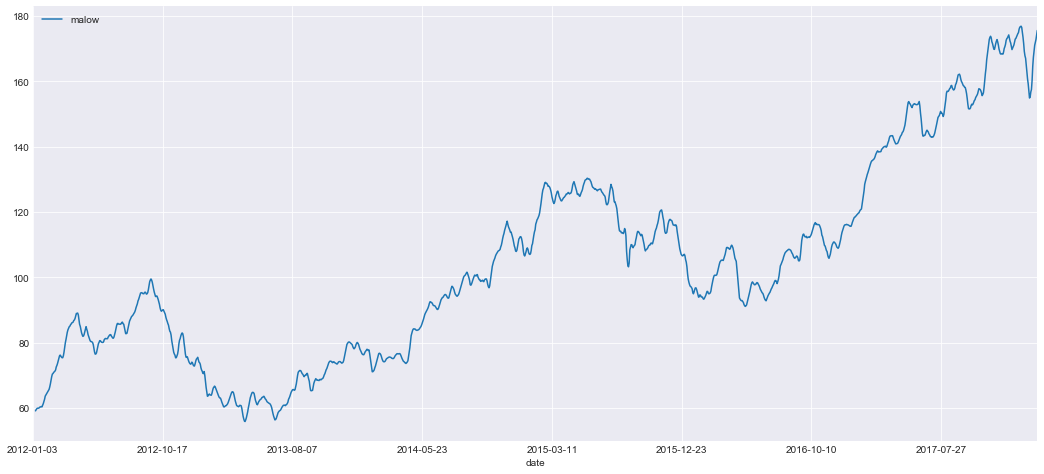

In [23]:
plt.figure(figsize = (16,8))
sns.set_style("darkgrid")
df.plot(x = 'date' , y = 'malow' , figsize = (18,8))
plt.show()

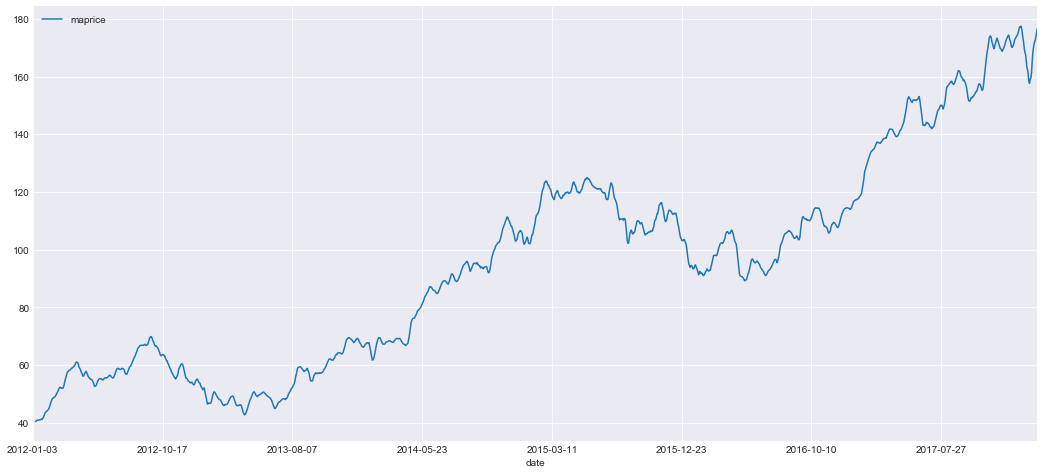

In [24]:
plt.figure(figsize = (16,8))
sns.set_style("darkgrid")
df.plot(x = 'date' , y = 'maprice' , figsize = (18,8))
plt.show()

# 3.2. Relative Strength Index

In [25]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'price', 'volume', 'ma',
       'maopen', 'mahigh', 'malow', 'maclose', 'maprice'],
      dtype='object')

In [26]:
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = pd.stats.moments.ewma(u, com=period-1, adjust=False) / \
         pd.stats.moments.ewma(d, com=period-1, adjust=False)
    return 100 - 100 / (1 + rs)

In [27]:
df['rsi'] = RSI(df.open, 14)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=13,min_periods=0,adjust=False,ignore_na=False).mean()
  # This is added back by InteractiveShellApp.init_path()


In [28]:
df.rsi.mean()

54.64047634800521

In [29]:
df['rsi_high'] = RSI(df.high, 14)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=13,min_periods=0,adjust=False,ignore_na=False).mean()
  # This is added back by InteractiveShellApp.init_path()


In [30]:
df.rsi_high.mean()

54.89979663521213

In [31]:
df['rsi_low'] = RSI(df.low, 14)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=13,min_periods=0,adjust=False,ignore_na=False).mean()
  # This is added back by InteractiveShellApp.init_path()


In [32]:
df.rsi_low.mean()

55.19399497998767

In [33]:
df['rsi_close'] = RSI(df.close, 14)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=13,min_periods=0,adjust=False,ignore_na=False).mean()
  # This is added back by InteractiveShellApp.init_path()


In [34]:
df.rsi_close.mean()

54.910690820777404

In [35]:
df['rsi_price'] = RSI(df.price, 14)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=13,min_periods=0,adjust=False,ignore_na=False).mean()
  # This is added back by InteractiveShellApp.init_path()


In [36]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'price', 'volume', 'ma',
       'maopen', 'mahigh', 'malow', 'maclose', 'maprice', 'rsi', 'rsi_high',
       'rsi_low', 'rsi_close', 'rsi_price'],
      dtype='object')

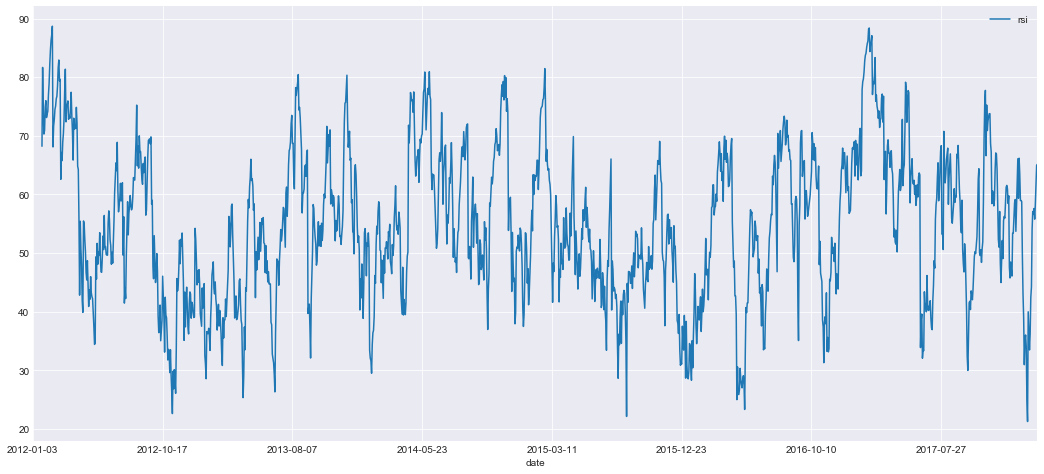

In [37]:
plt.figure(figsize = (16,8))
sns.set_style("darkgrid")
df.plot(x = 'date' , y = 'rsi' , figsize = (18,8))
plt.show()

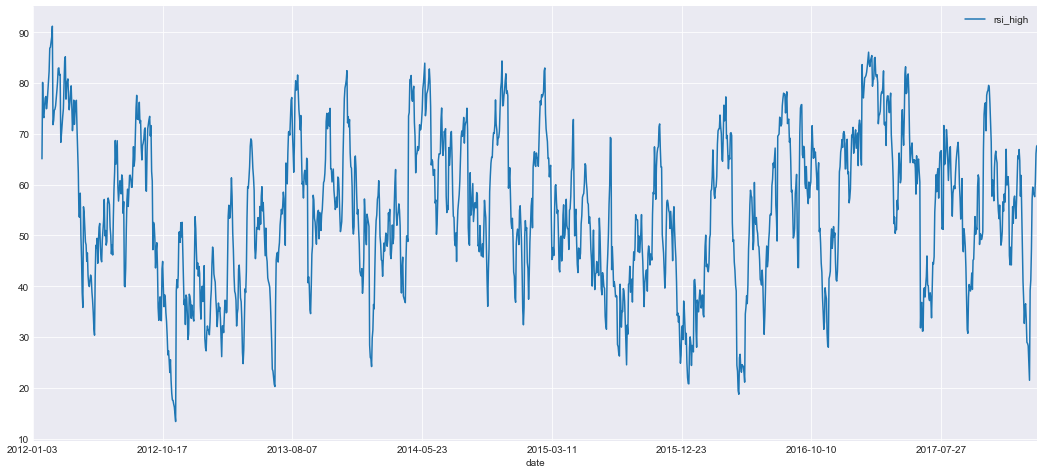

In [38]:
plt.figure(figsize = (16,8))
sns.set_style("darkgrid")
df.plot(x = 'date' , y = 'rsi_high' , figsize = (18,8))
plt.show()

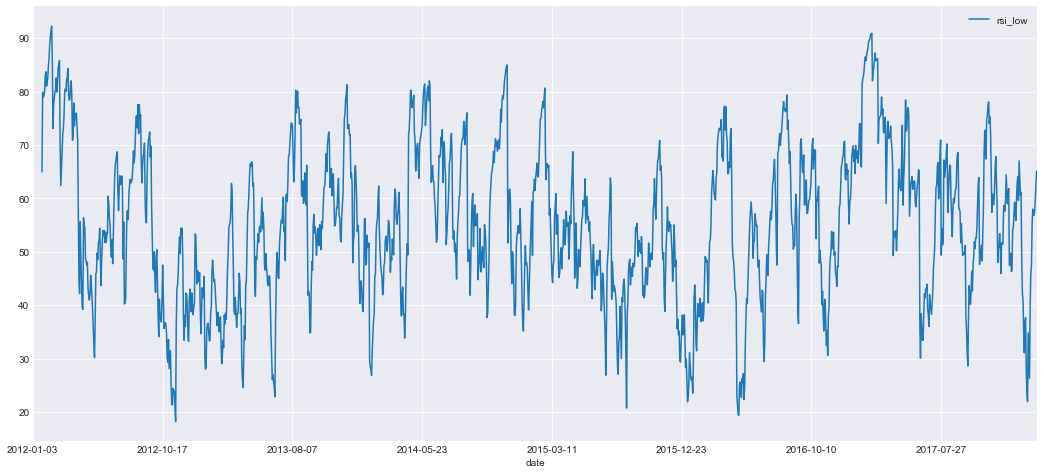

In [39]:
plt.figure(figsize = (16,8))
sns.set_style("darkgrid")
df.plot(x = 'date' , y = 'rsi_low' , figsize = (18,8))
plt.show()

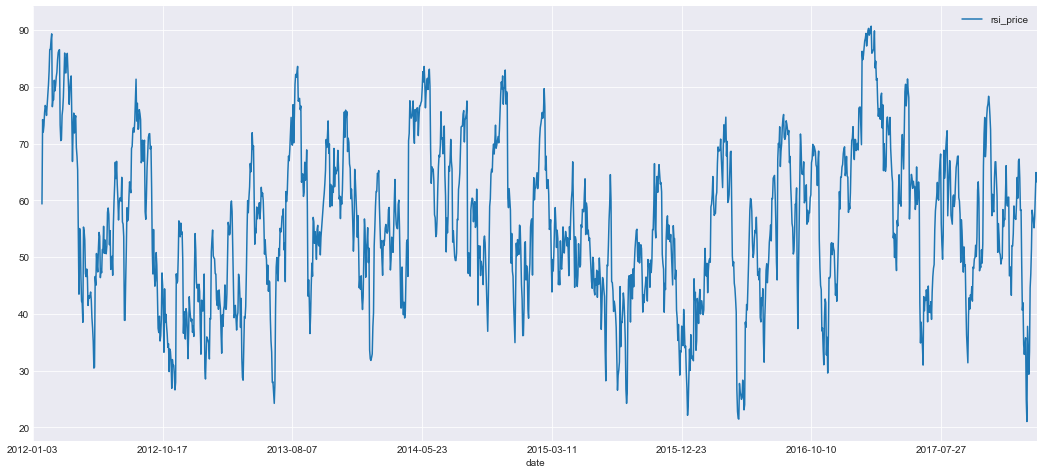

In [40]:
plt.figure(figsize = (16,8))
sns.set_style("darkgrid")
df.plot(x = 'date' , y = 'rsi_price' , figsize = (18,8))
plt.show()

In [41]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'price', 'volume', 'ma',
       'maopen', 'mahigh', 'malow', 'maclose', 'maprice', 'rsi', 'rsi_high',
       'rsi_low', 'rsi_close', 'rsi_price'],
      dtype='object')

In [42]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'price', 'volume', 'ma',
       'maopen', 'mahigh', 'malow', 'maclose', 'maprice', 'rsi', 'rsi_high',
       'rsi_low', 'rsi_close', 'rsi_price'],
      dtype='object')

In [43]:
df.drop('volume', axis =1, inplace =True)

# 4. Prediction

In [44]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'price', 'ma', 'maopen',
       'mahigh', 'malow', 'maclose', 'maprice', 'rsi', 'rsi_high', 'rsi_low',
       'rsi_close', 'rsi_price'],
      dtype='object')

In [45]:
df.head()

,date,open,high,low,close,price,ma,maopen,mahigh,malow,maclose,maprice,rsi,rsi_high,rsi_low,rsi_close,rsi_price
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,39.769264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,39.982990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,40.426876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,40.849491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,40.784698,59.623715,59.417715,59.892286,59.186286,59.623715,40.362664,NaN,NaN,NaN,NaN,NaN


In [46]:
train = df[[ 'open', 'high', 'low', 'close','price']].copy()

In [47]:
train.head()

,open,high,low,close,price
0,58.485714,58.928570,58.428570,58.747143,39.769264
1,58.571430,59.240002,58.468571,59.062859,39.982990
2,59.278572,59.792858,58.952858,59.718571,40.426876
3,59.967144,60.392857,59.888573,60.342857,40.849491
4,60.785713,61.107143,60.192856,60.247143,40.784698


In [48]:
train.head()

,open,high,low,close,price
0,58.485714,58.928570,58.428570,58.747143,39.769264
1,58.571430,59.240002,58.468571,59.062859,39.982990
2,59.278572,59.792858,58.952858,59.718571,40.426876
3,59.967144,60.392857,59.888573,60.342857,40.849491
4,60.785713,61.107143,60.192856,60.247143,40.784698


In [49]:
mmsc = MinMaxScaler(feature_range = (0, 1))
train.open =  mmsc.fit_transform(train.open.values.reshape(-1,1))
train.high =  mmsc.fit_transform(train.high.values.reshape(-1,1))
train.low =   mmsc.fit_transform(train.low.values.reshape(-1,1))
train.close = mmsc.fit_transform(train.close.values.reshape(-1,1))
train.price = mmsc.fit_transform(train.price.values.reshape(-1,1))

In [50]:
train.head()

,open,high,low,close,price
0,0.024700,0.014918,0.027705,0.023950,0.000000
1,0.025391,0.017439,0.028030,0.026507,0.001535
2,0.031097,0.021914,0.031960,0.031818,0.004724
3,0.036652,0.026771,0.039553,0.036874,0.007760
4,0.043256,0.032553,0.042022,0.036099,0.007295


In [51]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns) # 5
    data = stock.as_matrix() 
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 22days
    
    result = np.array(result)
    row = round(0.9 * result.shape[0]) # 90% split
    train = result[:int(row), :] # 90% date, all features 
    
    x_train = train[:, :-1] 
    y_train = train[:, -1][:,-1]
    
    x_test = result[int(row):, :-1] 
    y_test = result[int(row):, -1][:,-1]

#     x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
#     x_test =    x_test.reshape(x_test.shape[0], x_test.shape[1], 1) 

    return [x_train, y_train, x_test, y_test]

In [52]:
window = 20
X_train, y_train, X_test, y_test = load_data(train, window)

In [53]:
X_train

array([[[0.02469975, 0.01491779, 0.02770531, 0.02395029, 0.        ],
        [0.02539131, 0.0174388 , 0.0280299 , 0.02650731, 0.00153538],
        [0.03109657, 0.02191413, 0.03195966, 0.03181801, 0.0047242 ],
        ...,
        [0.06497083, 0.05652569, 0.06801136, 0.06566084, 0.02504531],
        [0.06654986, 0.06279346, 0.0698893 , 0.07229054, 0.02902616],
        [0.07793732, 0.06781233, 0.07879212, 0.07630538, 0.03143692]],

       [[0.02539131, 0.0174388 , 0.0280299 , 0.02650731, 0.00153538],
        [0.03109657, 0.02191413, 0.03195966, 0.03181801, 0.0047242 ],
        [0.036652  , 0.02677107, 0.03955255, 0.03687419, 0.00776021],
        ...,
        [0.06654986, 0.06279346, 0.0698893 , 0.07229054, 0.02902616],
        [0.07793732, 0.06781233, 0.07879212, 0.07630538, 0.03143692],
        [0.08118763, 0.06867962, 0.08166698, 0.07596985, 0.03123541]],

       [[0.03109657, 0.02191413, 0.03195966, 0.03181801, 0.0047242 ],
        [0.036652  , 0.02677107, 0.03955255, 0.03687419, 0.0

In [54]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

ValueError: cannot reshape array of size 137500 into shape (1375,20,1)

In [ ]:
train.head()

In [ ]:
X_train[0]

In [ ]:
X_train[1]

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
train.loc[0]

In [ ]:
y_train[0]

In [ ]:
y_test

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

# 4.2 Building The Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor=Sequential()
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 5)))
regressor.add(Dropout(0.4))

In [ ]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

In [ ]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

In [ ]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.4))

In [ ]:
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))

In [ ]:
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

In [ ]:
predicted_stock_price=regressor.predict(X_test)
#predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price=mmsc.inverse_transform(predicted_stock_price)

In [ ]:
print(predicted_stock_price)

In [ ]:
'''
plt.plot(y_test)
plt.plot(predicted_stock_price)
'''

# Prediction with respect to the World News

In [ ]:
data_with_news = pd.read_csv('Combined_News_DJIA.csv')

In [ ]:
data_with_news.head()

# Here we will consider top 10 Headlines

In [ ]:
data_with_news.columns

In [ ]:
data  = data_with_news[['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10']].copy()

In [ ]:
data.columns

In [ ]:
data.columns = ['date', 'label', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10']

In [ ]:
data.sample()

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data = data.sort_values('date')

In [ ]:
data.head(2)

In [ ]:
data.tail(2)

# Natural Language Processing for the News Articles

In [ ]:
data.sample()

In [ ]:
data.columns

In [ ]:
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# 2.1 Lower Case

In [ ]:
for i in labels:
    data[i] = data[i].astype(str).str.lower()

In [ ]:
data['1'].iloc[0]

Now everything is lower case

# 2.2 Removing Useless Stuff

In [ ]:
for i in labels:
    data[i] = data[i].str.replace('[^a-zA-Z]', ' ')

In [ ]:
data['3'].iloc[9]

# 2.3 Lemmatizing

In [ ]:
from textblob import TextBlob
from textblob import Word
#nltk.download('wordnet')
for i in labels:
    data[i] = data[i].apply(lambda x : ' '.join([Word(word).lemmatize() for word in x.split()]))
#data['comment_text'].head()

# 2.4 Removing Words size less than 4

In [ ]:
def pir(data):
    t = data.text.str.split(expand=True).stack()
    return t.loc[t.str.len() >= 4].groupby(level=0).apply(' '.join)
for i in labels:
    data[i] = data[i].str.findall('\w{4,}').str.join(' ')


# 2.5 Removing Stop Words

In [ ]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
for i in labels:
    data[i] = data[i].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# 2.6 TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

for i in labels:
    data[i] = tfidf.fit_transform(data[i]).toarray()


Text Claffication is Done 

# 3. Concating 

Concating the Stock data with the Prices

# 3.1 Extracting Data

In [ ]:
datah = pd.read_csv('data_with_news.csv')

In [ ]:
datah.shape

In [ ]:
data.shape

In [ ]:
datah.columns


 If we are doing fundamental analysis we dony need all the technical analysis like open, close and high except the Adj Close

In [ ]:
datah2 = datah[['Date', 'Adj Close', 'Volume']].copy()

In [ ]:
datah2.shape

# 3.2 Resetting Index

In [ ]:
datah2.head()

In [ ]:
data.head()

In [ ]:
datah2.drop(datah2.index[0], inplace = True)

In [ ]:
data.tail()

In [ ]:
datah2.tail()

In [ ]:
data.drop(data.index[1988], inplace = True)

In [ ]:
data.shape

In [ ]:
datah2.shape

# 3.3 Merging

In [ ]:
data = pd.merge(data, datah2, left_index=True, right_index=True)

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
data.drop('Date', axis =1, inplace = True)

In [ ]:
data.drop('date', axis =1, inplace = True)


# 4. Splitting

In [ ]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns) # 5
    data = stock.as_matrix() 
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 22days
    
    result = np.array(result)
    row = round(0.9 * result.shape[0]) # 90% split
    train = result[:int(row), :] # 90% date, all features 
    
    x_train = train[:, :-1] 
    y_train = train[:, -1][:,-1]
    
    x_test = result[int(row):, :-1] 
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [ ]:
window = 20
X_train, y_train, X_test, y_test = load_data(data, window)

In [ ]:
X_train[2]

# 5.MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor=Sequential()
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 13)))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error')

regressor.fit(X_train,y_train,epochs=200,batch_size=32)

# Final Model 

# Combination of both Technical and Fundamental Analysis

In [ ]:
data_with_news = pd.read_csv('Combined_News_DJIA.csv')

In [ ]:
data_with_news.columns

In [ ]:
data  = data_with_news[['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10','Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25']].copy()

In [ ]:
data['1'] = data['Top1'] + data['Top2'] + data['Top3'] + data['Top4']+ data['Top5']
data['2'] = data['Top6'] + data['Top7'] + data['Top8'] + data['Top9']+ data['Top10']
data['3'] = data['Top11'] + data['Top12'] + data['Top13'] + data['Top14']+ data['Top15']
data['4'] = data['Top16'] + data['Top17'] + data['Top18'] + data['Top19']+ data['Top20']
data['5'] = data['Top21'] + data['Top22'] + data['Top23'] + data['Top24']+ data['Top25']



In [ ]:
data.columns

In [ ]:
data = data[['Date', 'Label','1', '2', '3', '4', '5']].copy()

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data = data.sort_values('Date')

# NLP

In [ ]:
labels = ['1', '2', '3', '4', '5']

In [ ]:
#Convertng to Lower Case
for i in labels:
    data[i] = data[i].astype(str).str.lower()

In [ ]:
#Removing All the useless symbols
for i in labels:
    data[i] = data[i].str.replace('[^a-zA-Z]', ' ')

In [ ]:
#Removing Stop Words

from nltk.corpus import stopwords

stop = stopwords.words('english')
for i in labels:
    data[i] = data[i].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
#Bag of Words

from sklearn.feature_extraction.text import CountVectorizer
for i in labels:
    vectorizer = CountVectorizer()
    data[i] = vectorizer.fit_transform(data[i]).toarray()
    #X.toarray()
#print(vectorizer.get_feature_names())

In [ ]:
#Getting the Historical Prices

datah = pd.read_csv('data_with_news.csv')
datah2 = datah[['Date', 'Adj Close', 'Volume']].copy()

In [ ]:
#Merging the News and Historical Prices

datah2.drop(datah2.index[0], inplace = True)
data.drop(data.index[1988], inplace = True)
data = pd.merge(data, datah2, left_index=True, right_index=True)

In [ ]:
data.columns

In [ ]:
#Dropping the extra column
data.drop('Date_x', axis =1, inplace = True)

In [ ]:
data.drop('Date_y',axis =1, inplace = True)

# Splitting

In [ ]:
data.columns

In [ ]:
data['maprice'] = data['Adj Close'].rolling(window =5).mean()

In [ ]:
#Relative Strength Index

def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = pd.stats.moments.ewma(u, com=period-1, adjust=False) / \
         pd.stats.moments.ewma(d, com=period-1, adjust=False)
    return 100 - 100 / (1 + rs)

In [ ]:
data['rsi'] = RSI(data['Adj Close'], 14)

In [ ]:
data.columns

# Test and Train Split

In [ ]:
data.columns

In [ ]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns) # 5
    data = stock.as_matrix() 
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 22days
    
    result = np.array(result)
    row = round(0.9 * result.shape[0]) # 90% split
    train = result[:int(row), :] # 90% date, all features 
    
    x_train = train[:, :-1] 
    y_train = train[:, -1][:,-1]
    
    x_test = result[int(row):, :-1] 
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [ ]:
window = 20
X_train, y_train, X_test, y_test = load_data(data, window)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
y_train

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor=Sequential()
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 10)))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error')

regressor.fit(X_train,y_train,epochs=200,batch_size=32)